In [1]:

import os
os.chdir('c:\\Users\\ma11115\\OneDrive - Imperial College London\\github_folder\\STK_SEARCH\\')


from stk_search import Searched_space
import importlib
importlib.reload(Searched_space)
import pickle
import pymongo
import pandas as pd
import numpy as np
from stk_search import Database_utils


In [2]:
#%% 
# Load the searched space
df_path = 'data/output/Full_datatset/df_total_new2023_08_20.csv'
df_precursors_path = 'Data/output/Prescursor_data/calculation_data_precursor_310823_clean.pkl'
df_total, df_precursors = Database_utils.load_data_from_file(df_path, df_precursors_path)
#df_total = Database_utils.load_data_database()

C:\Users\ma11115\OneDrive - Imperial College London\github_folder\STK_search\src\stk_search\Database_utils.py:68: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv(df_path)


In [3]:
import random
import numpy as np
import torch

# Random Seeds and Reproducibility
torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [4]:
df_total.head()

,_id_x,InChIKey,BB,aI,bI,nBB,_id_y,Excited state energy (eV),Excited state oscillator strength,Host IP_x,...,LUMO (eV)_5,HOMO_LUMO_GAP (eV)_5,IP (eV)_5,EA (eV)_5,1 Excited state Energy (eV)_5,1 Excited state Osc_5,2 Excited state Energy (eV)_5,2 Excited state Osc_5,3 Excited state Energy (eV)_5,3 Excited state Osc_5
0,64d1217354f281add0a7057d,CLUOOVKTWZALSH-UHFFFAOYSA-N,"[{'InChIKey': 'PNLCAIFEPYYUCC-UHFFFAOYSA-N'}, ...","[[0, 0, 0], [5, 5, 1], [1, 1, 0], [5, 5, 0], [...","[[0, 0], [5, 5], [1, 1], [5, 5], [2, 2], [4, 4...","[1, 1, 1, 1, 1, 1]",64d3e80354f281add0b79e76,"[3.994, 4.042, 4.08, 4.086, 4.117, 4.135, 4.53...","[0.1243, 0.153, 1.1697, 0.0908, 0.0574, 0.225,...",129.31.64.208,...,-7.9660,2.506486,6.2332,2.3708,3.963,0.2318,4.387,0.1730,4.622,0.0000
1,64d20d2654f281add0ab2f3e,FIAQXLPLTBETIQ-UHFFFAOYSA-N,"[{'InChIKey': 'PNLCAIFEPYYUCC-UHFFFAOYSA-N'}, ...","[[0, 0, 0], [1, 1, 0], [2, 2, 0], [3, 3, 0], [...","[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [0, 0...","[1, 1, 1, 1, 1, 1]",64d2671c54f281add0ab9f94,"[3.97, 3.993, 4.033, 4.048, 4.1, 4.468, 4.493,...","[0.1121, 0.7001, 0.151, 0.2114, 0.4041, 0.0137...",NaN,...,-7.0334,3.799284,6.8301,1.1176,4.976,0.0019,5.181,0.0083,5.464,0.0025
2,64d2150f54f281add0ab3f67,BPPOMYWNHKZIDY-UHFFFAOYSA-N,"[{'InChIKey': 'PNLCAIFEPYYUCC-UHFFFAOYSA-N'}, ...","[[5, 5, 0], [5, 5, 1], [0, 0, 0], [1, 1, 0], [...","[[5, 5], [5, 5], [0, 0], [1, 1], [2, 2], [3, 3...","[1, 1, 1, 1, 1, 1]",64d3d13154f281add0b6e336,"[3.309, 3.524, 3.539, 3.801, 3.968, 4.022, 4.0...","[0.0925, 0.0002, 0.0114, 0.0521, 0.0396, 0.962...",129.31.64.208,...,-9.2095,2.106172,7.2112,3.5160,3.552,0.0000,3.559,0.0001,4.109,0.0251
3,64d2202a54f281add0ab4d61,HEARLZDLHXVYEJ-UHFFFAOYSA-N,"[{'InChIKey': 'PNLCAIFEPYYUCC-UHFFFAOYSA-N'}, ...","[[0, 0, 0], [5, 5, 0], [5, 5, 1], [1, 1, 0], [...","[[0, 0], [5, 5], [5, 5], [1, 1], [4, 4], [2, 2...","[1, 1, 1, 1, 1, 1]",64d2661554f281add0ab9dae,"[3.967, 3.995, 4.052, 4.068, 4.08, 4.475, 4.5,...","[0.1829, 0.5274, 0.5539, 0.151, 0.1505, 0.0058...",NaN,...,-7.4250,3.394780,6.6286,1.7879,4.907,0.0069,4.965,0.0014,5.214,0.2465
4,64d2826454f281add0abad9b,BBWANVAHXIOZBW-UHFFFAOYSA-N,"[{'InChIKey': 'PNLCAIFEPYYUCC-UHFFFAOYSA-N'}, ...","[[0, 0, 0], [3, 3, 0], [5, 5, 0], [3, 3, 1], [...","[[0, 0], [3, 3], [5, 5], [3, 3], [5, 5], [1, 1...","[1, 1, 1, 1, 1, 1]",64d2827854f281add0abadb7,"[3.865, 3.897, 3.913, 3.949, 4.37, 4.397, 4.40...","[0.0999, 0.0303, 0.1944, 0.7833, 0.0004, 0.116...",NaN,...,-7.4250,3.394780,6.6286,1.7879,4.907,0.0069,4.965,0.0014,5.214,0.2465


# Building the graph


In [5]:
df_precursors.columns[2:7]
Frag_features ={col:df_precursors[col].values for col in df_precursors.columns[2:7]}
def get_frag_features(frag_InChIKey, Frag_features=Frag_features):
    frag_id = df_precursors[df_precursors['InChIKey']==frag_InChIKey]
    if len(frag_id) == 0:
        print('No fragment found')
        return None
    frag_id = frag_id.index[0]
    Features = [
        Frag_features[col][frag_id] for col in Frag_features.keys()
    ]
    return Features
nodes = [get_frag_features(frag_InChIKey=df_total[f'InChIKey_{x}'][0]) for x in range(6)]
nodes

[[-10.4725, -7.966, 2.506486327599, 6.2332, 2.3708],
 [-10.4725, -7.966, 2.506486327599, 6.2332, 2.3708],
 [-10.4725, -7.966, 2.506486327599, 6.2332, 2.3708],
 [-10.4725, -7.966, 2.506486327599, 6.2332, 2.3708],
 [-10.4725, -7.966, 2.506486327599, 6.2332, 2.3708],
 [-10.4725, -7.966, 2.506486327599, 6.2332, 2.3708]]

In [6]:
# edge features
def get_edge_features(id):
    edge_index0, edge_index1 = [], []
    bond_fvs = []

    for i in range(4):
        j=i+1
        t=i+2
        edge_index0 += [i, j]
        edge_index1 += [j, i]
        bond_fvs += [[0,]]
        #edge_index0 += [i, t]
        #edge_index1 += [t, i]
        #frag_id = df_precursors[df_precursors['InChIKey']== df_total[f'InChIKey_{j}'][0]].index[0]
        #bond_fvs += [[df_precursors['Atom_num'][frag_id]]]

    edge_index = [edge_index0, edge_index1]
    return edge_index, bond_fvs
edge_index, bond_fvs = get_edge_features(0)
edge_index, bond_fvs

([[0, 1, 1, 2, 2, 3, 3, 4], [1, 0, 2, 1, 3, 2, 4, 3]], [[0], [0], [0], [0]])

In [7]:
import torch
from torch_geometric.data import Data

# convert our data to tensors, which are used for model training
mol_id = 0
nodes = [get_frag_features(frag_InChIKey=df_total[f'InChIKey_{x}'][mol_id]) for x in range(6)]
edge_index, bond_fvs = get_edge_features(mol_id)

x = torch.tensor(nodes, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long)
edge_attr = torch.tensor(bond_fvs, dtype=torch.float)
y = torch.tensor([df_total[f'target'][mol_id]], dtype=torch.float)

dmf_data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)
dmf_data

Data(x=[6, 5], edge_index=[2, 8], edge_attr=[4, 1], y=[1])

In [8]:
dmf_data.validate(raise_on_error=True)


True

In [9]:
from tqdm import tqdm
import pandas as pd
import torch
from torch_geometric.data import (
    Data,
    InMemoryDataset,
    download_url,
)
from ogb.utils import smiles2graph


class ESOLGraphData(InMemoryDataset):
    """The ESOL graph dataset using PyG
    """
    # ESOL dataset download link
    #raw_url = 'https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/delaney-processed.csv'

    def __init__(self, root, transform=None):
        super().__init__(root, transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return ['delaney-processed.csv']

    @property
    def processed_file_names(self):
        return ['data.pt']

    def download(self):
        print('Downloading ESOL dataset...')
        #file_path = download_url(self.raw_url, self.raw_dir)

    def process(self):
        # load raw data from a csv file
        df = df_total
        InChIKey = df['InChIKey'].values.tolist()
        target = df['target'].values.tolist()

        # Convert SMILES into graph data
        print('Converting SMILES strings into graphs...')
        data_list = []
        
        for mol_id, smi in enumerate(tqdm(InChIKey)):

            nodes = [get_frag_features(frag_InChIKey=df_total[f'InChIKey_{x}'][mol_id]) for x in range(6)]
            edge_index, bond_fvs = get_edge_features(mol_id)

            x = torch.tensor(nodes, dtype=torch.float)
            edge_index = torch.tensor(edge_index, dtype=torch.long)
            edge_attr = torch.tensor(bond_fvs, dtype=torch.float)
            y = torch.tensor([df_total[f'target'][mol_id]], dtype=torch.float)

            data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)
            data_list.append(data)

        # save data
        torch.save(self.collate(data_list), self.processed_paths[0])

In [10]:
dataset = ESOLGraphData(root='data/ESOL', transform=None)
dataset = dataset[:1000]

Processing...


Converting SMILES strings into graphs...


  0%|          | 0/40975 [00:00<?, ?it/s]

100%|██████████| 40975/40975 [02:15<00:00, 301.84it/s]
Done!


In [11]:
from deepchem.splits import RandomSplitter

# Normalize target to mean = 0 and std = 1.
mean = dataset.data.y.mean()
std = dataset.data.y.std()
mean, std = mean.item(), std.item()

# split data
splitter = RandomSplitter()
train_idx, valid_idx, test_idx = splitter.split(dataset, frac_train=0.7, frac_valid=0.1, frac_test=0.2)
train_dataset = dataset[list(train_idx)].copy()
valid_dataset = dataset[list(valid_idx)].copy()
test_dataset = dataset[list(test_idx)].copy()
train_dataset.data.y = (train_dataset.data.y - mean) / std
valid_dataset.data.y = (valid_dataset.data.y - mean) / std
test_dataset.data.y = (test_dataset.data.y - mean) / std
print(test_dataset.y.shape)

Skipped loading some Jax models, missing a dependency. No module named 'jax'
c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\torch_geometric\data\in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The given 'InMemoryDataset' only references a subset of examples of the full dataset, but 'data' will contain information of the full dataset. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


torch.Size([201])


c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\torch_geometric\data\in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [46]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.nn as nn

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, 6)
        self.out = nn.Linear(6, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        
        x = self.conv2(x, edge_index)
        x=x.squeeze(0)
        x = F.relu(x)
        #return F.log_softmax(x, dim=1)
        return self.out(x).mean()

In [47]:
from matplotlib import pyplot as plt
model = GCN()
print(model)

def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()
h = model.forward(dataset[0])
print(dataset[0].x.float())

print(h)

GCN(
  (conv1): GCNConv(5, 16)
  (conv2): GCNConv(16, 6)
  (out): Linear(in_features=6, out_features=1, bias=True)
)
tensor([[-10.4725,  -7.9660,   2.5065,   6.2332,   2.3708],
        [-10.4725,  -7.9660,   2.5065,   6.2332,   2.3708],
        [-10.4725,  -7.9660,   2.5065,   6.2332,   2.3708],
        [-10.4725,  -7.9660,   2.5065,   6.2332,   2.3708],
        [-10.4725,  -7.9660,   2.5065,   6.2332,   2.3708],
        [-10.4725,  -7.9660,   2.5065,   6.2332,   2.3708]])
tensor(-1.1190, grad_fn=<MeanBackward0>)


In [262]:
import torch
import torch.nn.functional as F
from torch.nn import GRU
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from torch_geometric.loader import DataLoader
from torch_geometric.nn import NNConv, MLP, global_add_pool
from ogb.graphproppred.mol_encoder import AtomEncoder, BondEncoder
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torcheval.metrics.functional import r2_score


class GCN(torch.nn.Module):
    def __init__(self,dim):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dim)

    def forward(self, x, edge_index):
        

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

class MPNN(pl.LightningModule):
    def __init__(self, hidden_dim, out_dim,
                 train_data, valid_data, test_data,
                 std, batch_size=32, lr=1e-3):
        super().__init__()
        self.std = std  # std of data's target
        self.train_data = train_data
        self.valid_data = valid_data
        self.test_data = test_data
        self.batch_size = batch_size
        self.lr = lr
        # Initial layers
        #self.atom_emb = AtomEncoder(emb_dim=hidden_dim)
        #self.bond_emb = BondEncoder(emb_dim=hidden_dim)
        # Message passing layers
        nn = MLP([hidden_dim, hidden_dim*2, hidden_dim*hidden_dim])
        self.conv = GCN(hidden_dim)#NNConv(dataset.num_edge_features,dataset.num_node_features, nn, aggr='mean')#
        self.gru = GRU(hidden_dim, hidden_dim)
        # Readout layers
        self.mlp = MLP([hidden_dim, int(hidden_dim/2), out_dim])

    def forward(self, data, mode="train"):

        # Initialization
        x = data.x
        h = x.unsqueeze(0)
        edge_attr = data.edge_attr
        edge_index = data.edge_index
        # Message passing
        for i in range(3):


            m = F.relu(self.conv(x,edge_index))  # send message and aggregation
            #m = F.relu(self.conv(x, data.edge_index, edge_attr))  # send message and aggregation
            x, h = self.gru(m.unsqueeze(0), h)  # node update
            x = x.squeeze(0)

        # Readout
        x = global_add_pool(x, data.batch)
        x = self.mlp(x)

        return x.view(-1)
        
    def training_step(self, batch, batch_idx):
        # Here we define the train loop.
        
        out = self.forward(batch, mode="train")
        loss = F.mse_loss(out, batch.y)
        self.log("Train loss", loss)
        return loss
    
    def validation_step(self, batch, batch_idx):
        # Define validation step. At the end of every epoch, this will be executed
        out = self.forward(batch, mode="valid")
        loss = F.mse_loss(out * self.std, batch.y * self.std)  # report MSE
        #fig, ax = plt.subplots(figsize=(5, 5))
        #ax.scatter(batch.y * self.std, out * self.std, s=10)
        #ax.set_xlabel("Target")
        #ax.set_ylabel("Predicted")
       # ax.set_title("Validation set")
        #self.logger.experiment.log({"Validation": wandb.Image(fig)})
        #fig.clf()
        #plt.close()
        self.log("Valid MSE", loss)
        
    def test_step(self, batch, batch_idx):
        # What to do in test
        out = self.forward(batch, mode="test")
        loss = F.mse_loss(out * self.std, batch.y * self.std)  # report MSE
        R2 = r2_score(out * self.std, batch.y * self.std)
        #print(f"R2 score on train set = {r2_score(train_dataset.y, torch.stack(predicted_data).squeeze(1)):.4f}.\n")
        self.log("Test MSE", loss)
        self.log("Test R2", R2)

    def configure_optimizers(self):
        # Here we configure the optimization algorithm.
        optimizer = torch.optim.Adam(
            self.parameters(),
            lr=self.lr
        )
        return optimizer
    
    def train_dataloader(self):
        return DataLoader(self.train_data, batch_size=self.batch_size, shuffle=True)
    
    def val_dataloader(self):
        return DataLoader(self.valid_data, batch_size=self.batch_size, shuffle=False)
    
    def test_dataloader(self):
        return DataLoader(self.test_data, batch_size=self.batch_size, shuffle=False)



In [296]:
# Here we create an instance of our GNN.
# Play around with the hyperparameters!
# This will ask you to login to your wandb account
import wandb

wandb.init(project="gnn-test_new",
           config={
               "batch_size": 100,
               "learning_rate": 0.001,
               "hidden_size": 3,
               "max_epochs": 100,
           },
           name="test1");
gnn_model = MPNN(
    hidden_dim=wandb.config["hidden_size"],
    out_dim=1,
    std=std,
    train_data=train_dataset,
    valid_data=valid_dataset,
    test_data=test_dataset,
    lr=wandb.config["learning_rate"],
    batch_size=wandb.config["batch_size"]
)

# Define trainer: How we want to tain the model
wandb_logger = WandbLogger()
trainer = pl.Trainer(
    max_epochs = wandb.config["max_epochs"],
    logger = wandb_logger,
    log_every_n_steps = 50,

)

# Finally! Training a model :)
trainer.fit(
    model=gnn_model,
)

# Now run test
results = trainer.test(ckpt_path="best")


# Test RMSE
test_mse = results[0]["Test MSE"]
test_rmse = test_mse ** 0.5
print(f"\nMPNN model performance: RMSE on test set = {test_rmse:.4f}.\n")

Test MSE,▁
Test R2,▁
Train loss,█▆▅▅▄▄▃▃▃▃▂▂▂▂▁▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Valid MSE,█▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
Test MSE,0.0985
Test R2,-0.06448
Train loss,0.07622
Valid MSE,0.13349
epoch,100


c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\pytorch_lightning\loggers\wandb.py:398: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
0 | conv | GCN  | 115   
1 | gru  | GRU  | 72    
2 | mlp  | MLP  | 8     
------------------------------
195       Trainable params
0         Non-trainable params
195       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\pytorch_lightning\utilities\data.py:76: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 6. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, trai

Training: 0it [00:00, ?it/s]

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 1])

Predicting: 0it [00:00, ?it/s]

R2 score on train set = -227.9352.



Text(0.5, 1.0, 'test set performance')

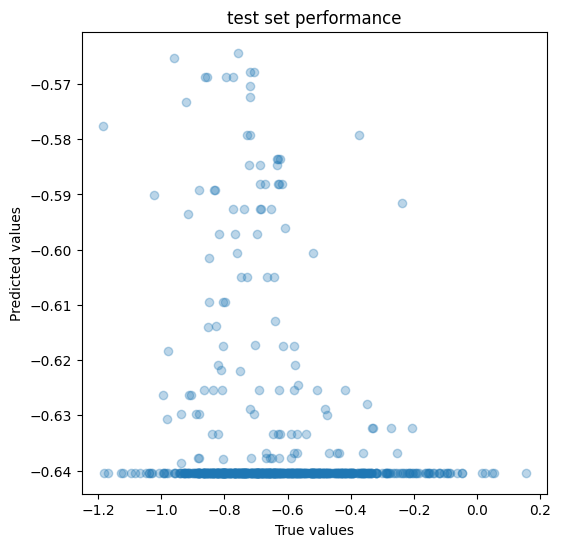

In [271]:
# visualise the model performance
import matplotlib.pyplot as plt
import seaborn as sns
from torcheval.metrics.functional import r2_score
test =train_dataset
predicted_data = trainer.predict(trainer.model,test)

print(f"R2 score on train set = {r2_score(test.y, torch.stack(predicted_data).squeeze(1)):.4f}.\n")
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(test.y  ,
    torch.stack(predicted_data),
    alpha=0.3
)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
ax.set_title("test set performance")


In [268]:
h = [trainer.model.conv(x).reshape(-1,1) for x in dataset]
print(h[0].squeeze(1).shape)
print(torch.cat(h, dim=1).shape)
print(test.y.shape)
h=torch.cat(h, dim=1)
# run a pca to visualize the embedding
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
h_pca = pca.fit_transform(h.transpose(0,1).detach().cpu().numpy())
print(h_pca.shape)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(h_pca[:, 0], h_pca[:, 1], s=50,c=dataset.y, cmap="Set2")
plt.xticks([])
plt.yticks([])
print(h_pca.shape)
    

TypeError: GCN.forward() missing 1 required positional argument: 'edge_index'

In [221]:
wandb.finish()

ESOLGraphData(700)

In [187]:
tt = torch.stack(predicted_data).squeeze(1)-test.y
tt=tt.abs()

In [189]:
tt.mean()**2

tensor(0.0280)

In [186]:
test =train_dataset[:50]

In [300]:
data = DataLoader(train_dataset, batch_size=64, shuffle=False)
train_features, train_labels = next(iter(data))
train_features

ValueError: too many values to unpack (expected 2)

In [299]:
tow